37 labels

Enoki Mushroom, Shiitake mushrooms, apple, banana, beaf, bean_sprouts, bellpepper, bread, brocoli, cabbage, carrot, cheese, chicken, chili, corn, cucumber, egg, eggplant, fish, garlic, ginger, green_onion, kimchi, lettuce, mushroom, onion, orange, pork, potato, pumpkin, radish, sausage, shrimp, sweet_potato, tofu, tomato, tuna can

train pairs: 10287 /
test pairs: 1059 /
valid pairs: 599 /
Total pairs: 11945

In [ ]:
!git clone https://github.com/ultralytics/ultralytics

Cloning into 'ultralytics'...
remote: Enumerating objects: 35621, done.
remote: Counting objects: 100% (4198/4198), done.
remote: Compressing objects: 100% (1826/1826), done.
remote: Total 35621 (delta 2893), reused 3504 (delta 2352), pack-reused 31423
Receiving objects: 100% (35621/35621), 29.80 MiB | 33.42 MiB/s, done.
Resolving deltas: 100% (25652/25652), done.


In [ ]:
%cd ./ultralytics

/content/ultralytics


In [ ]:
!pip install -e .

Obtaining file:///content/ultralytics
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)

In [ ]:
!pip install -q roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.1 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
import os
import torch
import yaml
from IPython.display import Image, clear_output  # to display images

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.3.1+cu121 (NVIDIA A100-SXM4-40GB)


In [ ]:
data_dir = '/content/drive/MyDrive/DAB/fused_food_ingredients_0806'
data_yaml = '/content/drive/MyDrive/DAB/fused_food_ingredients_0806/data.yaml'

In [ ]:
with open(data_yaml) as f:
    film = yaml.load(f, Loader=yaml.FullLoader)
    display(film)

{'train': '../train/images',
 'val': '../valid/images',
 'test': '../test/images',
 'nc': 37,
 'names': ['Enoki Mushroom',
  'Shiitake mushrooms',
  'apple',
  'banana',
  'beaf',
  'bean_sprouts',
  'bellpepper',
  'bread',
  'brocoli',
  'cabbage',
  'carrot',
  'cheese',
  'chicken',
  'chili',
  'corn',
  'cucumber',
  'egg',
  'eggplant',
  'fish',
  'garlic',
  'ginger',
  'green_onion',
  'kimchi',
  'lettuce',
  'mushroom',
  'onion',
  'orange',
  'pork',
  'potato',
  'pumpkin',
  'radish',
  'sausage',
  'shrimp',
  'sweet_potato',
  'tofu',
  'tomato',
  'tuna can'],
 'roboflow': {'workspace': 'dab-zgcvo',
  'project': 'food_ingredients_fused',
  'version': 2,
  'license': 'CC BY 4.0',
  'url': 'https://universe.roboflow.com/dab-zgcvo/food_ingredients_fused/dataset/2'}}

In [ ]:
import os

# 특정 폴더 내의 파일 수를 세는 함수
def count_files_in_directory(directory):
    file_count = 0
    for root, dirs, files in os.walk(directory):
        file_count += len(files)
    return file_count

# 각 'labels' 폴더의 파일 수 출력 함수
def count_files_in_labels_folders(label_folders):
    for folder in label_folders:
        file_count = count_files_in_directory(folder)
        print(f"{folder} 폴더의 파일 수: {file_count}개")

# 'labels' 폴더의 위치들
labels_folders = [
    '/content/drive/MyDrive/DAB/fused_food_ingredients_0806/valid/images',
    '/content/drive/MyDrive/DAB/fused_food_ingredients_0806/train/images',
    '/content/drive/MyDrive/DAB/fused_food_ingredients_0806/test/images'
]

# 각 'labels' 폴더의 파일 수 출력
count_files_in_labels_folders(labels_folders)



/content/drive/MyDrive/DAB/fused_food_ingredients_0806/valid/images 폴더의 파일 수: 599개
/content/drive/MyDrive/DAB/fused_food_ingredients_0806/train/images 폴더의 파일 수: 10287개
/content/drive/MyDrive/DAB/fused_food_ingredients_0806/test/images 폴더의 파일 수: 1059개


In [ ]:
from ultralytics import YOLO

In [ ]:
checkpoint_dir = '/content/drive/MyDrive/DAB/checkpoints/0808'
os.makedirs(checkpoint_dir, exist_ok=True)
import shutil

In [ ]:
# 8월 7일자 모델, 추가 13000 개 단일 식자재 이미지셋 (11 labels)에 대해서 50 에폭 돌린 상태
checkpoint_dir = '/content/drive/MyDrive/DAB/checkpoints/0807'
model = YOLO(os.path.join(checkpoint_dir, 'best.pt'))
model.train(data=data_yaml, epochs=50, imgsz=640, batch=32, cache=True)

Ultralytics YOLOv8.2.74 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/DAB/checkpoints/0807/best.pt, data=/content/drive/MyDrive/DAB/fused_food_ingredients_0806/data.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=True, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False

100%|██████████| 755k/755k [00:00<00:00, 16.1MB/s]


Overriding model.yaml nc=11 with nc=37

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 6.25M/6.25M [00:00<00:00, 72.3MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/.shortcut-targets-by-id/1ARi7Che_ahdQ5phVp7P39s1lEBmIdgU1/DAB/fused_food_ingredients_0806/train/labels... 10287 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10287/10287 [07:58<00:00, 21.48it/s]

train: WARNING ⚠️ /content/drive/.shortcut-targets-by-id/1ARi7Che_ahdQ5phVp7P39s1lEBmIdgU1/DAB/fused_food_ingredients_0806/train/images/465_png.rf.264bd51d37910b92d96bbbadf5fae932.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/.shortcut-targets-by-id/1ARi7Che_ahdQ5phVp7P39s1lEBmIdgU1/DAB/fused_food_ingredients_0806/train/images/465_png.rf.86e33deece5d68f081680c19fefb6160.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/drive/.shortcut-targets-by-id/1ARi7Che_ahdQ5phVp7P39s1lEBmIdgU1/DAB/fused_food_ingredients_0806/train/images/465_png.rf.9524194d0feb509fdd7eb08fad9ff800.jpg: 1 duplicate labels removed


train: New cache created: /content/drive/.shortcut-targets-by-id/1ARi7Che_ahdQ5phVp7P39s1lEBmIdgU1/DAB/fused_food_ingredients_0806/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 375, len(boxes) = 79651. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


train: Caching images (11.8GB RAM): 100%|██████████| 10287/10287 [00:31<00:00, 326.88it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/.shortcut-targets-by-id/1ARi7Che_ahdQ5phVp7P39s1lEBmIdgU1/DAB/fused_food_ingredients_0806/valid/labels... 599 images, 0 backgrounds, 0 corrupt: 100%|██████████| 599/599 [00:23<00:00, 25.60it/s]


val: New cache created: /content/drive/.shortcut-targets-by-id/1ARi7Che_ahdQ5phVp7P39s1lEBmIdgU1/DAB/fused_food_ingredients_0806/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 13, len(boxes) = 4761. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


val: Caching images (0.7GB RAM): 100%|██████████| 599/599 [00:01<00:00, 322.75it/s]


Plotting labels to /content/ultralytics/runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000244, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/ultralytics/runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.57G      1.642      3.375      1.565        247        640: 100%|██████████| 322/322 [00:52<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.51it/s]

                   all        599       4761      0.774      0.228      0.237      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.53G      1.384      1.274      1.353        245        640: 100%|██████████| 322/322 [00:42<00:00,  7.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.92it/s]


                   all        599       4761      0.688      0.358       0.36       0.22

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.45G      1.242     0.9797      1.262        209        640: 100%|██████████| 322/322 [00:41<00:00,  7.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.16it/s]


                   all        599       4761      0.646      0.371      0.414      0.259

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.77G      1.135     0.8329      1.194        276        640: 100%|██████████| 322/322 [00:41<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.03it/s]


                   all        599       4761      0.606      0.405      0.444      0.282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.68G       1.05     0.7506      1.147        242        640: 100%|██████████| 322/322 [00:41<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.28it/s]

                   all        599       4761      0.597      0.435      0.462      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.58G     0.9864     0.6963      1.111        322        640: 100%|██████████| 322/322 [00:41<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  3.98it/s]

                   all        599       4761      0.642      0.422      0.476      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.54G     0.9362     0.6556      1.084        290        640: 100%|██████████| 322/322 [00:40<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.20it/s]

                   all        599       4761      0.644      0.421      0.483      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.53G     0.8909     0.6223      1.064        231        640: 100%|██████████| 322/322 [00:41<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.35it/s]

                   all        599       4761      0.617      0.446      0.487       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.76G     0.8558     0.5984      1.045        284        640: 100%|██████████| 322/322 [00:40<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.31it/s]

                   all        599       4761      0.672       0.44      0.498      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.53G     0.8256     0.5734      1.032        203        640: 100%|██████████| 322/322 [00:41<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.30it/s]

                   all        599       4761      0.633      0.437      0.502      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.53G     0.8113     0.5633      1.025        213        640: 100%|██████████| 322/322 [00:41<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.22it/s]

                   all        599       4761      0.584       0.47      0.501      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      4.55G     0.7862     0.5449      1.016        257        640: 100%|██████████| 322/322 [00:40<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.31it/s]

                   all        599       4761      0.656      0.436       0.51      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.67G      0.765     0.5306      1.004        309        640: 100%|██████████| 322/322 [00:41<00:00,  7.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.30it/s]

                   all        599       4761       0.61      0.465      0.514      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.53G     0.7499     0.5199     0.9982        228        640: 100%|██████████| 322/322 [00:41<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.27it/s]

                   all        599       4761      0.619      0.461      0.519      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.73G     0.7375     0.5125     0.9928        286        640: 100%|██████████| 322/322 [00:40<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.38it/s]

                   all        599       4761      0.615      0.485      0.525      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.53G     0.7188     0.4978     0.9843        312        640: 100%|██████████| 322/322 [00:40<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.28it/s]

                   all        599       4761      0.543      0.477      0.515      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.53G     0.7103     0.4926     0.9803        280        640: 100%|██████████| 322/322 [00:41<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.25it/s]

                   all        599       4761      0.607      0.454      0.513      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.52G     0.7021     0.4862     0.9771        366        640: 100%|██████████| 322/322 [00:40<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.21it/s]

                   all        599       4761      0.588      0.502      0.528       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.54G     0.6924     0.4794     0.9733        218        640: 100%|██████████| 322/322 [00:40<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.33it/s]

                   all        599       4761      0.603      0.477      0.526      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.64G     0.6853     0.4732     0.9697        202        640: 100%|██████████| 322/322 [00:41<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.22it/s]

                   all        599       4761      0.614      0.472      0.529      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.53G     0.6716     0.4629     0.9654        208        640: 100%|██████████| 322/322 [00:40<00:00,  7.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.37it/s]

                   all        599       4761      0.628      0.471      0.525      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.55G     0.6635     0.4594     0.9606        312        640: 100%|██████████| 322/322 [00:41<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.33it/s]

                   all        599       4761      0.574       0.49      0.525      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.55G     0.6578     0.4537     0.9586        275        640: 100%|██████████| 322/322 [00:40<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.26it/s]

                   all        599       4761      0.586      0.494      0.534      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.55G     0.6478     0.4476     0.9546        180        640: 100%|██████████| 322/322 [00:40<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.32it/s]

                   all        599       4761       0.58      0.484      0.531      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.68G     0.6446      0.444     0.9534        291        640: 100%|██████████| 322/322 [00:41<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.32it/s]

                   all        599       4761       0.61      0.512      0.536      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.72G     0.6411     0.4431     0.9534        285        640: 100%|██████████| 322/322 [00:40<00:00,  7.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.25it/s]

                   all        599       4761      0.577      0.506      0.537      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.56G     0.6333     0.4354     0.9489        236        640: 100%|██████████| 322/322 [00:40<00:00,  7.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.31it/s]

                   all        599       4761      0.614      0.496      0.534      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.52G     0.6285     0.4328     0.9472        242        640: 100%|██████████| 322/322 [00:40<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.24it/s]

                   all        599       4761       0.64      0.483      0.537      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50       4.5G     0.6249     0.4305     0.9458        206        640: 100%|██████████| 322/322 [00:40<00:00,  7.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.32it/s]

                   all        599       4761      0.617      0.512      0.541      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.54G     0.6206     0.4265     0.9438        320        640: 100%|██████████| 322/322 [00:41<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.31it/s]

                   all        599       4761      0.644      0.499      0.537       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50       4.5G     0.6171     0.4256     0.9444        293        640: 100%|██████████| 322/322 [00:40<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.22it/s]

                   all        599       4761      0.657      0.498      0.539      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.53G     0.6098     0.4204     0.9384        240        640: 100%|██████████| 322/322 [00:40<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.33it/s]

                   all        599       4761       0.72      0.481      0.537       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.51G     0.6084     0.4184     0.9391        341        640: 100%|██████████| 322/322 [00:41<00:00,  7.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.23it/s]

                   all        599       4761      0.654      0.479       0.54      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.56G     0.6037     0.4159     0.9384        202        640: 100%|██████████| 322/322 [00:40<00:00,  7.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.37it/s]

                   all        599       4761      0.666      0.496       0.54      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.56G     0.6013      0.413     0.9371        268        640: 100%|██████████| 322/322 [00:41<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.32it/s]

                   all        599       4761      0.677        0.5       0.54      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.49G      0.594     0.4082     0.9329        240        640: 100%|██████████| 322/322 [00:40<00:00,  7.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.26it/s]

                   all        599       4761       0.65      0.529      0.541      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.71G     0.5948     0.4088     0.9353        298        640: 100%|██████████| 322/322 [00:41<00:00,  7.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.36it/s]

                   all        599       4761      0.662       0.52      0.552      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.48G     0.5911     0.4069     0.9337        324        640: 100%|██████████| 322/322 [00:41<00:00,  7.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.33it/s]

                   all        599       4761      0.695      0.507      0.559       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.48G     0.5861     0.4032     0.9321        207        640: 100%|██████████| 322/322 [00:40<00:00,  7.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.32it/s]

                   all        599       4761      0.667      0.521      0.558      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.49G     0.5868     0.4037     0.9313        291        640: 100%|██████████| 322/322 [00:41<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.30it/s]

                   all        599       4761      0.683      0.513      0.554      0.385


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.87G      1.064     0.6632      1.293        123        640: 100%|██████████| 322/322 [00:42<00:00,  7.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.22it/s]

                   all        599       4761      0.636       0.52       0.56      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.61G      1.014     0.5977      1.248        121        640: 100%|██████████| 322/322 [00:39<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.28it/s]

                   all        599       4761      0.661      0.521      0.566      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.56G     0.9921       0.58      1.234        131        640: 100%|██████████| 322/322 [00:39<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.19it/s]

                   all        599       4761      0.687      0.509      0.568      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.55G     0.9811     0.5673      1.224        104        640: 100%|██████████| 322/322 [00:39<00:00,  8.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.34it/s]

                   all        599       4761      0.683      0.541      0.593      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.56G     0.9717     0.5614      1.217        129        640: 100%|██████████| 322/322 [00:39<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.29it/s]

                   all        599       4761      0.691      0.537      0.596      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.61G      0.964     0.5525      1.213        132        640: 100%|██████████| 322/322 [00:39<00:00,  8.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.31it/s]

                   all        599       4761      0.669       0.54      0.598      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.56G     0.9581     0.5497      1.209        122        640: 100%|██████████| 322/322 [00:39<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.21it/s]

                   all        599       4761      0.679      0.548      0.598       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.61G     0.9547     0.5446      1.205        115        640: 100%|██████████| 322/322 [00:39<00:00,  8.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.32it/s]

                   all        599       4761      0.681      0.544      0.598       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.55G     0.9524      0.545      1.204         96        640: 100%|██████████| 322/322 [00:39<00:00,  8.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.32it/s]

                   all        599       4761      0.682      0.537      0.597       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.55G     0.9463     0.5397      1.198        133        640: 100%|██████████| 322/322 [00:39<00:00,  8.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:02<00:00,  4.34it/s]

                   all        599       4761      0.709      0.548      0.596      0.428



50 epochs completed in 0.613 hours.
Optimizer stripped from /content/ultralytics/runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from /content/ultralytics/runs/detect/train/weights/best.pt, 6.3MB

Validating /content/ultralytics/runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.74 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 3,012,863 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  20%|██        | 2/10 [00:00<00:03,  2.44it/s]

WARNING ⚠️ NMS time limit 5.200s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:10<00:00,  1.08s/it]


                   all        599       4761      0.673      0.516      0.566      0.405
                 apple         60        171       0.87      0.912      0.939      0.604
                banana         51        120      0.763      0.867       0.87      0.509
                  beaf          5          5      0.503        0.4      0.461      0.372
          bean_sprouts          1          1          1          0          0          0
            bellpepper        164        176      0.838      0.847      0.856      0.652
               brocoli          7          7      0.557      0.368      0.402      0.365
               cabbage          4          4      0.617       0.25      0.445      0.349
                carrot        150        188      0.765      0.848      0.844      0.584
               chicken        152        473      0.869      0.805       0.83      0.639
                 chili         71         91      0.773      0.846      0.814      0.488
                  cor

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 2,  3,  4,  5,  6,  8,  9, 10, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c59a7122290>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,

Save & Inference (영빈아 내가 추가했어)

In [ ]:
import os
# yolov8 실행결과 디렉토리 경로
result_directory = '/content/ultralytics/runs/detect/train'
# yolov8 실행결과 디렉토리의 파일 및 디렉토리 목록 출력
print(f"result_directory: {result_directory}")
for item in os.listdir(result_directory):
    print(item)

result_directory: /content/ultralytics/runs/detect/train
val_batch2_labels.jpg
val_batch0_labels.jpg
train_batch12881.jpg
train_batch2.jpg
train_batch12880.jpg
events.out.tfevents.1723086738.42b2f618e799.3432.0
val_batch0_pred.jpg
labels.jpg
val_batch1_pred.jpg
P_curve.png
val_batch2_pred.jpg
labels_correlogram.jpg
confusion_matrix_normalized.png
F1_curve.png
PR_curve.png
train_batch0.jpg
train_batch1.jpg
weights
results.csv
R_curve.png
args.yaml
val_batch1_labels.jpg
confusion_matrix.png
train_batch12882.jpg
results.png


In [ ]:
# Checkpoint 생성
best_model_path = '/content/ultralytics/runs/detect/train/weights/best.pt'
last_model_path = '/content/ultralytics/runs/detect/train/weights/last.pt'

drive_best_model_path = '/content/drive/MyDrive/DAB/checkpoints/0808/best.pt'
drive_last_model_path = '/content/drive/MyDrive/DAB/checkpoints/0808/last.pt'

os.makedirs(os.path.dirname(drive_best_model_path), exist_ok=True)
os.makedirs(os.path.dirname(drive_last_model_path), exist_ok=True)

shutil.copyfile(best_model_path, drive_best_model_path)
shutil.copyfile(last_model_path, drive_last_model_path)

print(f"Best model saved to {drive_best_model_path}")
print(f"Last model saved to {drive_last_model_path}")

Best model saved to /content/drive/MyDrive/DAB/checkpoints/0808/best.pt
Last model saved to /content/drive/MyDrive/DAB/checkpoints/0808/last.pt


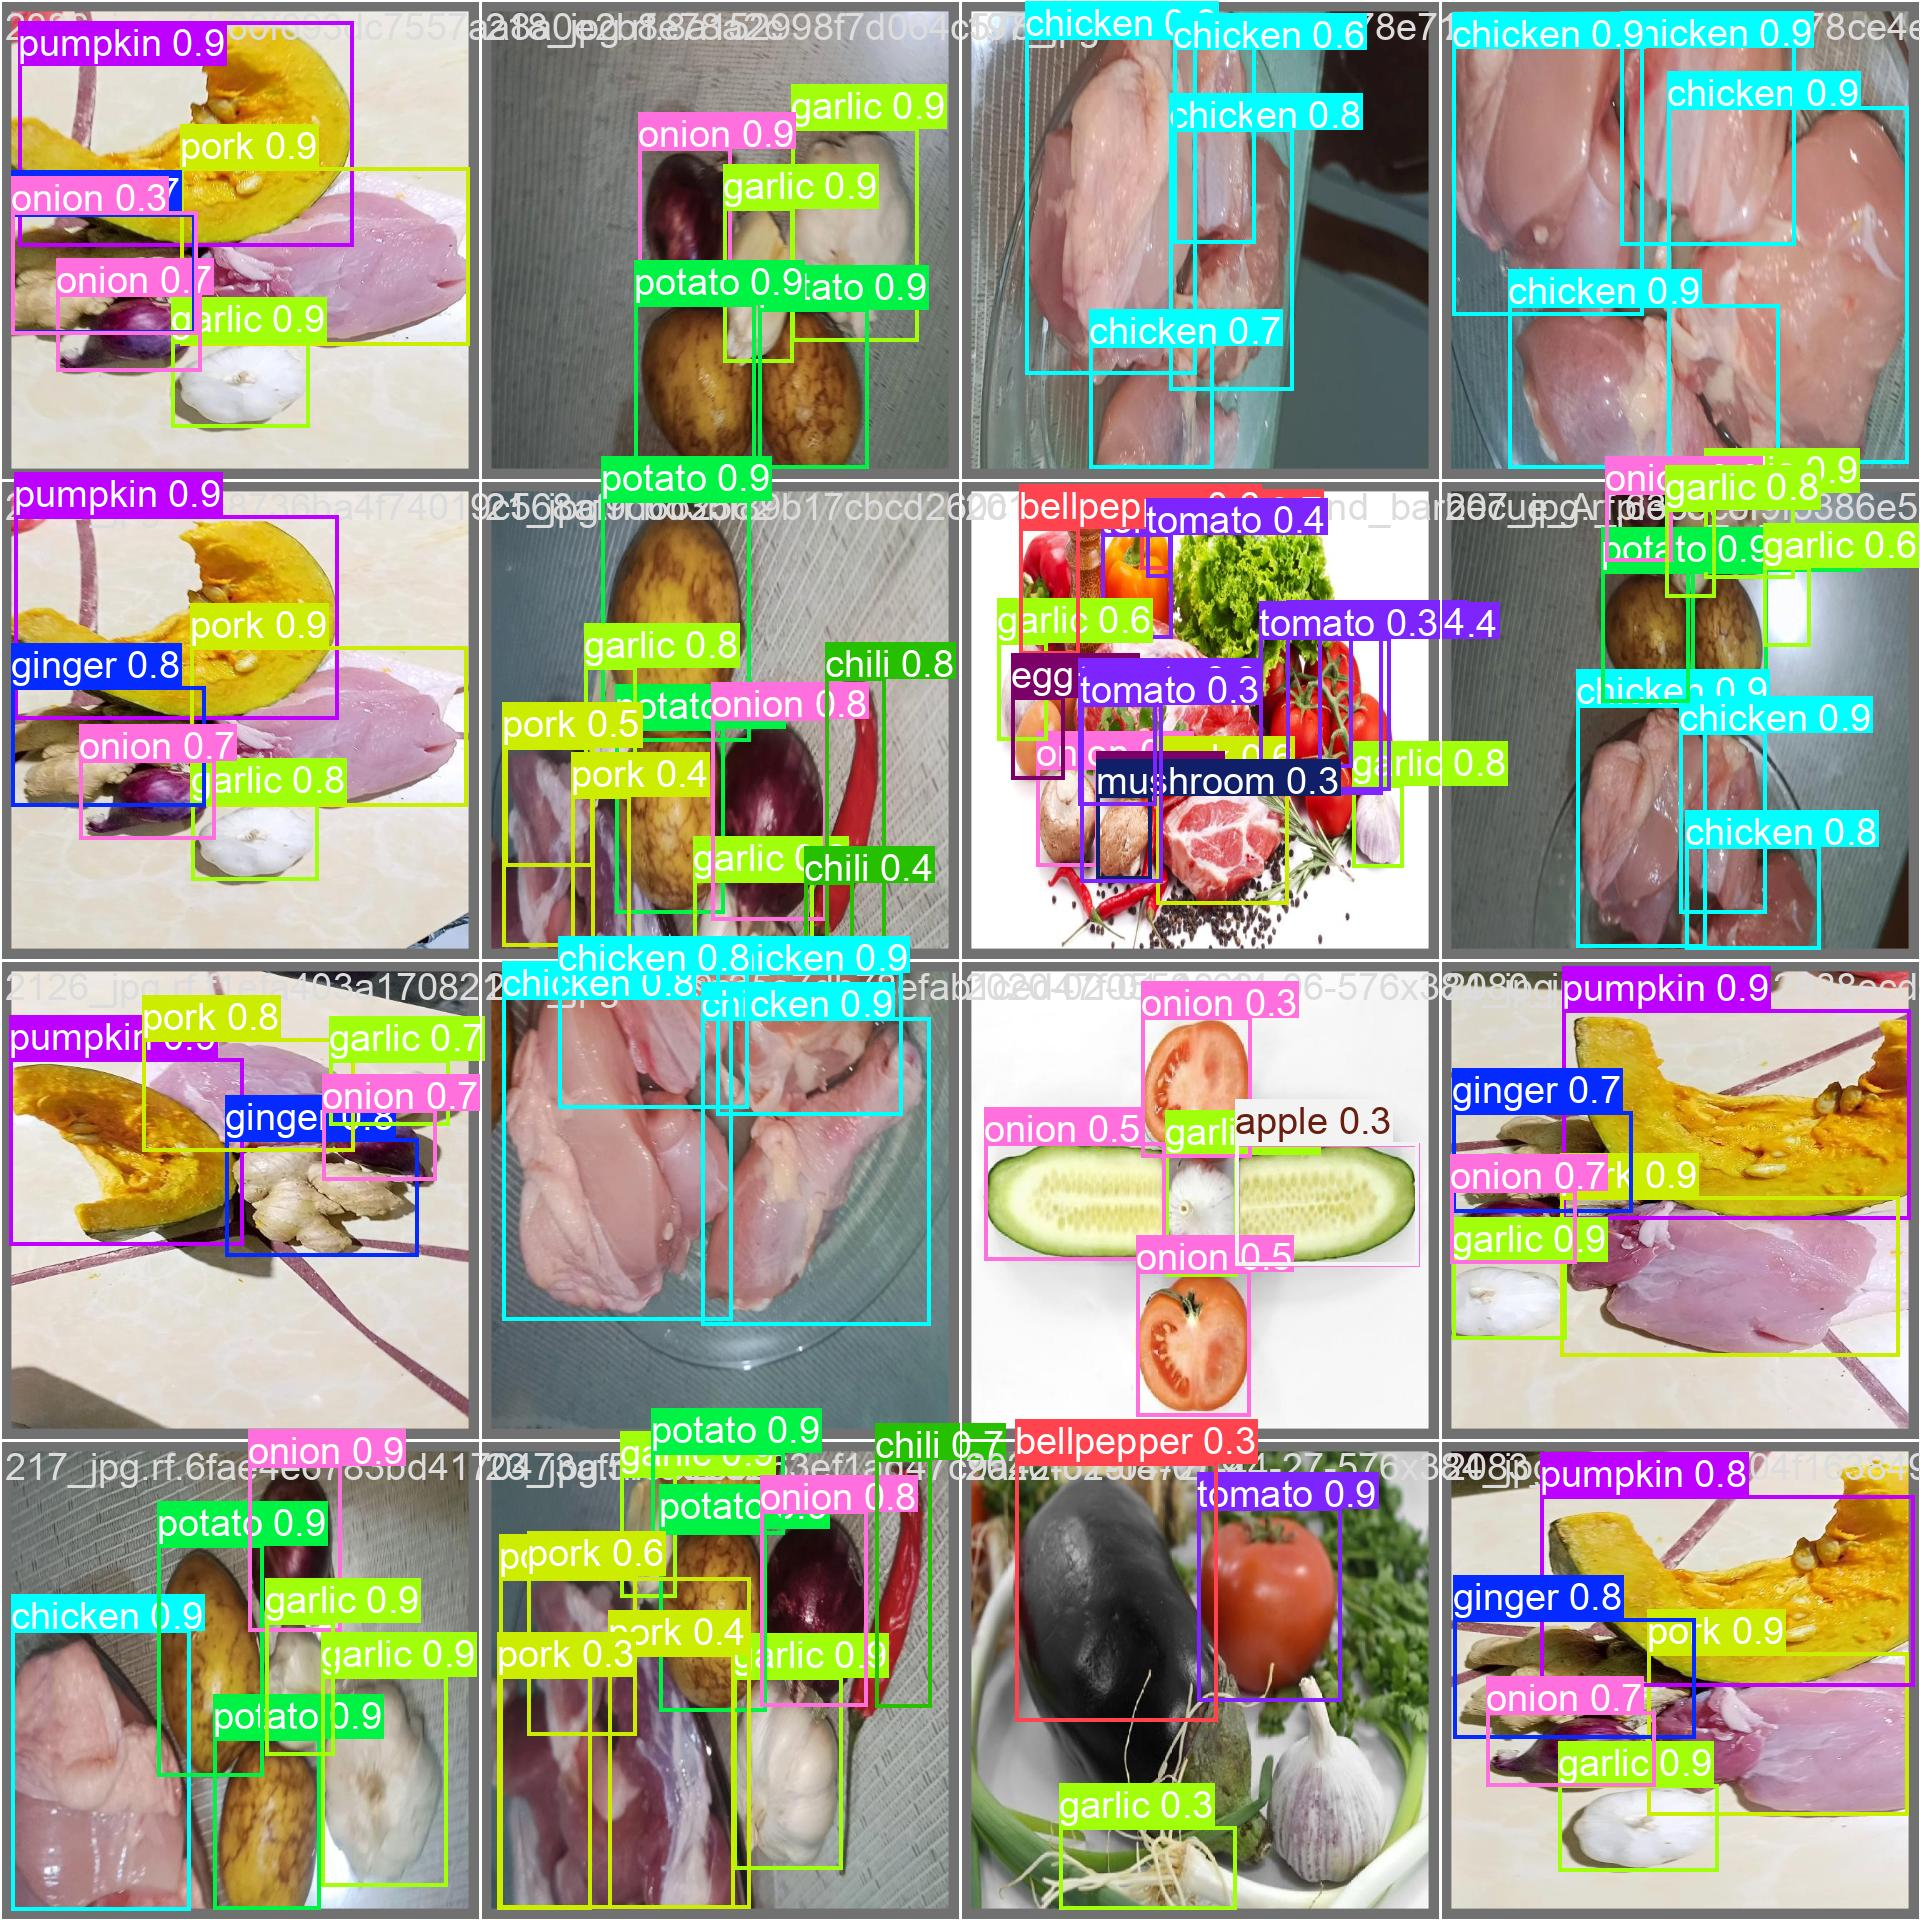

In [ ]:
# Validation image set에 대한 추론 결과 시각화
from IPython.display import Image, display
image_path = '/content/ultralytics/runs/detect/train/val_batch2_pred.jpg'
display(Image(filename=image_path, width=1500, height=1000))


image 1/1 /content/drive/MyDrive/DAB/inference_sample/tmp2.jpg: 640x640 5 garlics, 3 potatos, 2 tomatos, 8.3ms
Speed: 1.7ms preprocess, 8.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


array([[[145, 150, 148],
        [145, 150, 148],
        [145, 150, 148],
        ...,
        [164, 167, 165],
        [164, 167, 165],
        [164, 167, 165]],

       [[145, 150, 148],
        [145, 150, 148],
        [145, 150, 148],
        ...,
        [164, 167, 165],
        [164, 167, 165],
        [164, 167, 165]],

       [[145, 150, 148],
        [145, 150, 148],
        [145, 150, 148],
        ...,
        [164, 167, 165],
        [164, 167, 165],
        [164, 167, 165]],

       ...,

       [[144, 149, 148],
        [144, 149, 148],
        [144, 149, 148],
        ...,
        [116, 121, 119],
        [116, 121, 119],
        [116, 121, 119]],

       [[144, 149, 148],
        [144, 149, 148],
        [144, 149, 148],
        ...,
        [116, 121, 119],
        [116, 121, 119],
        [116, 121, 119]],

       [[144, 149, 148],
        [144, 149, 148],
        [144, 149, 148],
        ...,
        [116, 121, 119],
        [116, 121, 119],
        [116, 121, 119]]], dtype=uint8)
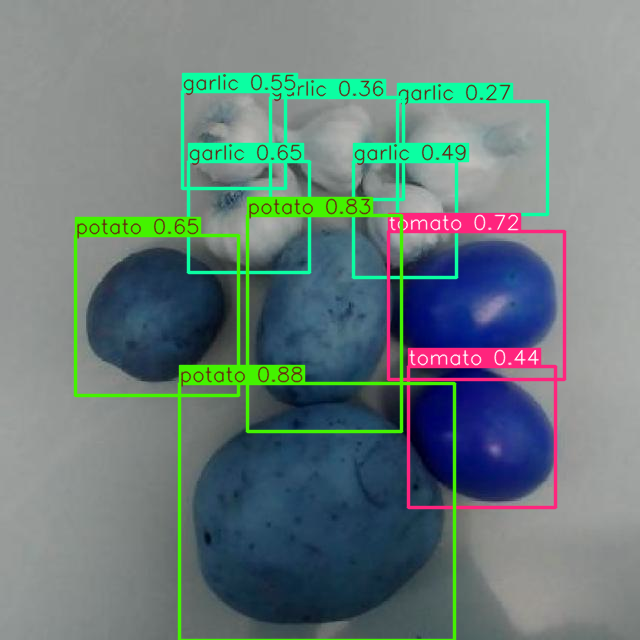

In [ ]:
# 처음 마주하는 이미지에 대한 추론 시각화
drive_best_model_path = '/content/drive/MyDrive/DAB/checkpoints/0808/best.pt'
model = YOLO(drive_best_model_path)
results = model('/content/drive/MyDrive/DAB/inference_sample/tmp2.jpg')
results[0].plot()  # 첫 번째 이미지의 결과 시각화